<a href="https://colab.research.google.com/github/Nongbon/Stat-Learning-for-Data-Sci/blob/main/Smoothing_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Smoothing Techniques

In [1]:
#upgrade statsmodels to 0.12.0
!pip install statsmodels==0.12.0

!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/ausair.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/books.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/oil.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/oilexample.csv

     |████████████████████████████████| 9.5MB 4.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
--2021-06-14 18:51:11--  https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/ausair.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503 [text/plain]
Saving to: ‘ausair.csv’

ausair.csv          100%[===================>]     503  --.-KB/s    in 0s      

2021-06-14 18:51:12 (20.1 MB/s) - ‘ausair.csv’ saved [503/503]

--2021-06-14 18:51:12--  https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/books.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Example1: Annual oil production (millions of tonnes), Saudi Arabia, 1965-2010.  - Using simple exponential smoothing technique

Text(0, 0.5, 'Oil (millions of tonnes)')

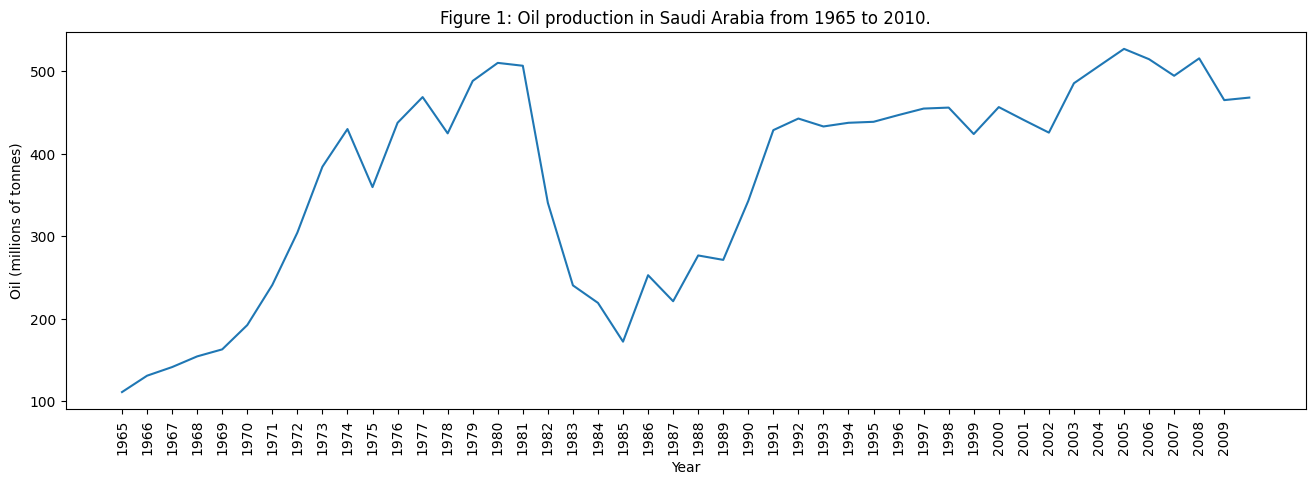

In [3]:
#load dataset
oildata = pd.read_csv('oil.csv')
plt.figure(figsize=(16,5), dpi=100)
# Set major ticks for x axis
major_xticks = np.arange(1965, 2010, 1)
plt.xticks(major_xticks, rotation=90)
plt.plot(oildata.Year,oildata.Production)
plt.title('Figure 1: Oil production in Saudi Arabia from 1965 to 2010.')
plt.xlabel('Year')
plt.ylabel('Oil (millions of tonnes)')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


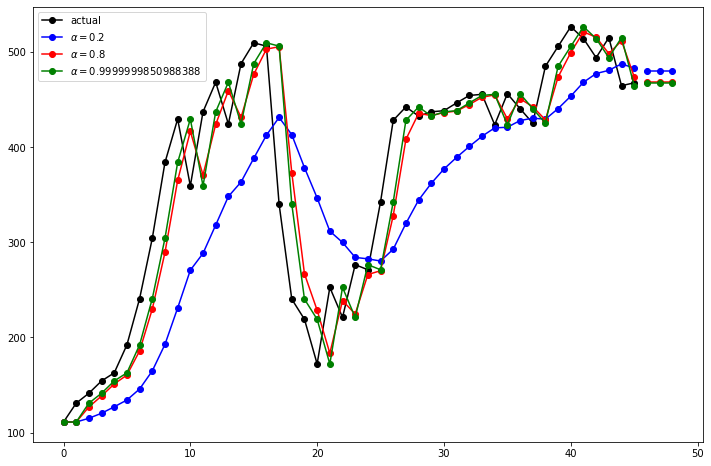

In [ ]:
#Simple Exponential Smoothing Method
fit1 = SimpleExpSmoothing(oildata.Production).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata.Production).fit(smoothing_level=0.8,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.8$')
fit3 = SimpleExpSmoothing(oildata.Production, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
actual, =plt.plot(oildata.Production, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([actual, line1, line2, line3], ["actual", fcast1.name, fcast2.name, fcast3.name])

เฉลย แบบฝึกปฏิบัติในห้อง

In [ ]:
#load dataset
oilexample = pd.read_csv('oilexample.csv')
fit1 = SimpleExpSmoothing(oilexample.Production).fit(smoothing_level=0.8,optimized=False)
result = pd.concat([oilexample.Production,fit1.fittedvalues.to_frame(name='fitted')], axis=1)
print(result)
#print(fit1.fittedvalues)
#print(fit1.fittedfcast)
#print(fit1.fcastvalues)

    Production      fitted
0   446.656523  446.656523
1   454.473307  446.656523
2   455.662974  452.909950
3   423.632239  455.112369
4   456.271328  429.928265
5   440.588050  451.002715
6   425.332520  442.670983
7   485.149448  428.800213
8   506.048162  473.879601
9   526.791983  499.614450
10  514.268889  521.356477
11  494.211019  515.686407
12  515.305242  498.506097
13  464.720467  511.945413
14  467.772364  474.165456


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Model Evaluation

In [ ]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(result.Production, result.fitted)
mse = metrics.mean_squared_error(result.Production, result.fitted)
rmse = np.sqrt(mse)  

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
mape = mean_absolute_percentage_error(result.Production, result.fitted)

print("Results of Holt linear trend:")
print("MAE:",mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

Results of Holt linear trend:
MAE: 20.721441161003362
MSE: 678.4066613645663
MAPE: 4.374133137897952
RMSE: 26.04624082981201


Example 2: Air Transport Passengers Australia (using Holt linear trend) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


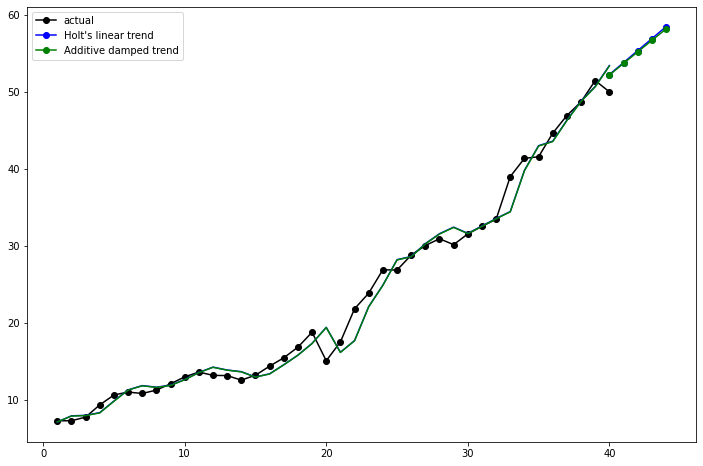

In [ ]:
#load dataset
air = pd.read_csv('ausair.csv', index_col="Time")
#Holt Linear Trend Smoothing Method
fit4 = Holt(air, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast4 = fit4.forecast(5).rename("Holt's linear trend")
fit5 = Holt(air, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast5 = fit5.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
line_actual, = plt.plot(air, marker='o', color='black')
plt.plot(fit4.fittedvalues, color='blue')
line4, = plt.plot(fcast4, marker='o', color='blue')
plt.plot(fit5.fittedvalues, color='green')
line5, = plt.plot(fcast5, marker='o', color='green')
plt.legend([line_actual, line4, line5], ["actual", fcast4.name, fcast5.name])

Assignment: Data set books contains the daily sales of paperback and hardcover books at the same store. The task is to forecast the next four days’ sales for paperback and hardcover books 
*  (a) Plot the series and discuss the main features of the data.
*  (b) Apply the simple exponential smoothing (SES) method to forecast each series, and plot theforecasts.
*  (c) Compute the RMSE values for the training data in each case.
*  (d) Apply Holts linear method to the paperback and hardback series and compute four-day forecasts in each case.
*  (e) Compare the RMSE measures of Holt's method for the two series to those of simple exponential smoothing in the previous question. (Remember that Holts method is using one more parameter than SES.) Discuss the merits of the two forecasting methods for these data sets.
*  (f) Compare the forecasts for the two series using both methods. Which do you think is best?

In [ ]:
#Type your code here
books = pd.read_csv('books.csv').rename(columns={'Unnamed: 0': 'Time'})
books.head()


,Time,Paperback,Hardcover
0,1,199,139
1,2,172,128
2,3,111,172
3,4,209,139
4,5,161,191


# (a) Plot the series and discuss the main features of the data.

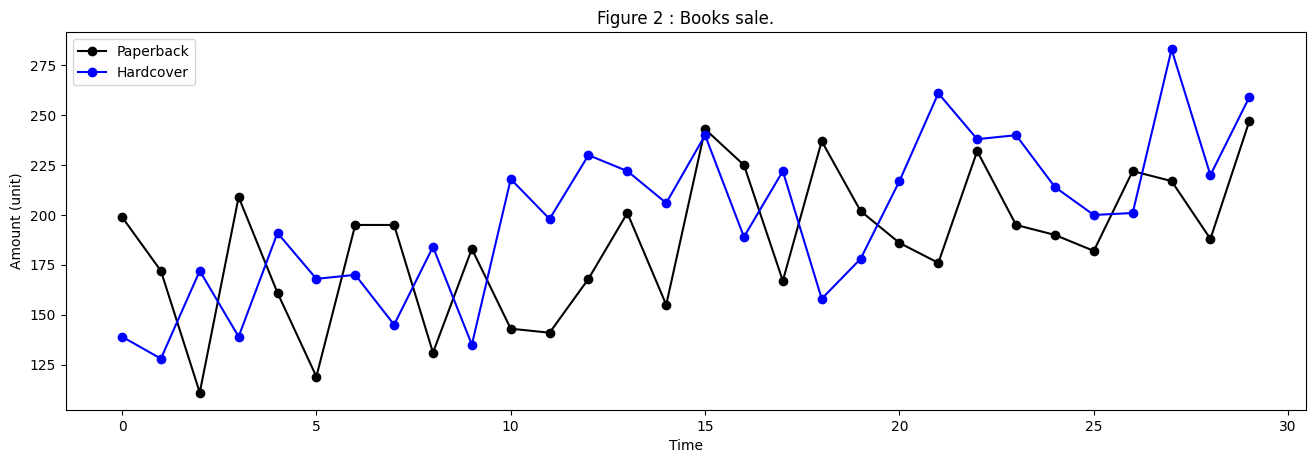

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
# major_xticks = np.arange(1965, 2010, 1)
# plt.xticks(major_xticks, rotation=90)
plt.plot(books.index, books.Paperback, label='Paperback', marker='o', c='k')
plt.plot(books.index, books.Hardcover, label='Hardcover', marker='o', c='b')
plt.title('Figure 2 : Books sale.')
plt.xlabel('Time')
plt.ylabel('Amount (unit)')
plt.legend()
plt.show()

# (b) Apply the simple exponential smoothing (SES) method to forecast each series, and plot theforecasts.

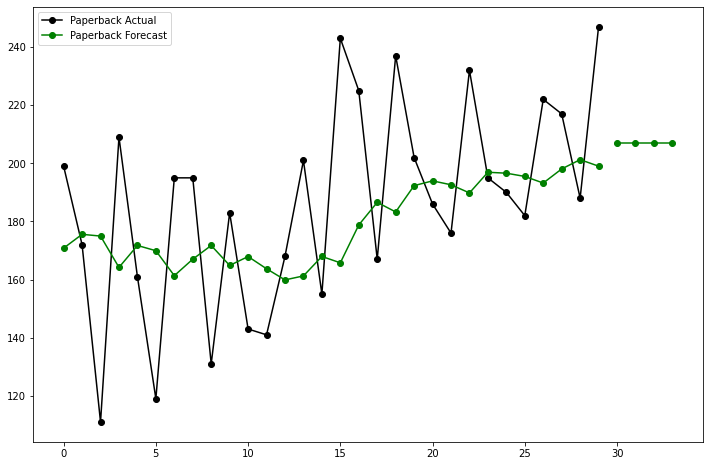

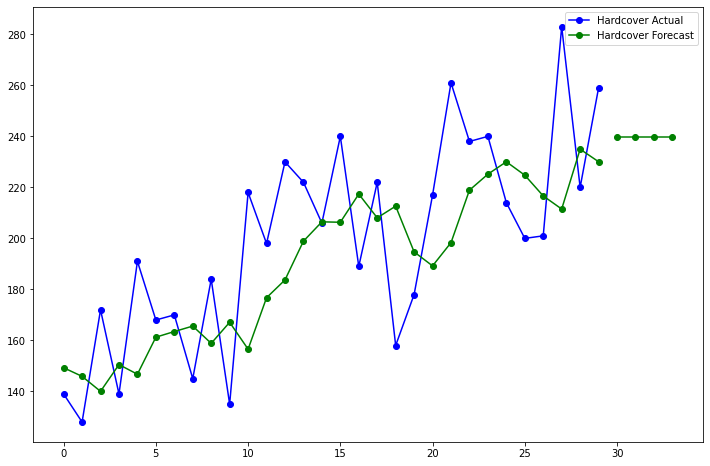

In [ ]:
def SES(column, nforcast, color='k'):
    fit3 = SimpleExpSmoothing(column, initialization_method="estimated").fit()
    fcast3 = fit3.forecast(nforcast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

    plt.figure(figsize=(12, 8))
    actual, = plt.plot(column, marker='o', color=color)
    plt.plot(fit3.fittedvalues, marker='o', color='green')
    line3, = plt.plot(fcast3, marker='o', color='green')
    plt.legend([actual, line3], [f"{column.name} Actual", f"{column.name} Forecast"])
    plt.show()

SES(books.Paperback, 4, 'k')
SES(books.Hardcover, 4, 'b')

# (c) Compute the RMSE values for the training data in each case.

In [ ]:
import sklearn.metrics as metrics

fit1 = SimpleExpSmoothing(books.Paperback, initialization_method="estimated").fit()
result1 = pd.concat([books.Paperback, fit1.fittedvalues.to_frame(name='fitted')], axis=1)

fit2 = SimpleExpSmoothing(books.Hardcover, initialization_method="estimated").fit()
result2 = pd.concat([books.Hardcover, fit2.fittedvalues.to_frame(name='fitted')], axis=1)

def RMSE(column, columnfitted):
    mse = metrics.mean_squared_error(column, columnfitted)
    rmse = np.sqrt(mse)  

    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
    mape = mean_absolute_percentage_error(column, columnfitted)
    print(f"RMSE of {column.name} Forcast : {rmse}")

RMSE(result1.Paperback, result1.fitted)
RMSE(result2.Hardcover, result2.fitted)

RMSE of Paperback Forcast : 33.63768671922144
RMSE of Hardcover Forcast : 31.931014939355126


# (d) Apply Holts linear method to the paperback and hardback series and compute four-day forecasts in each case.

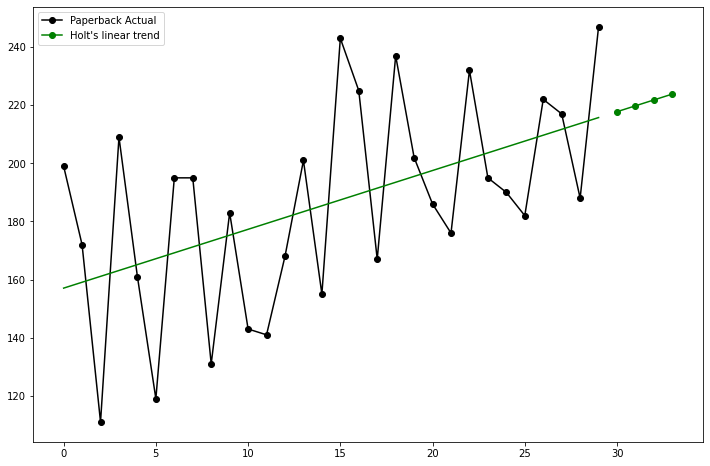

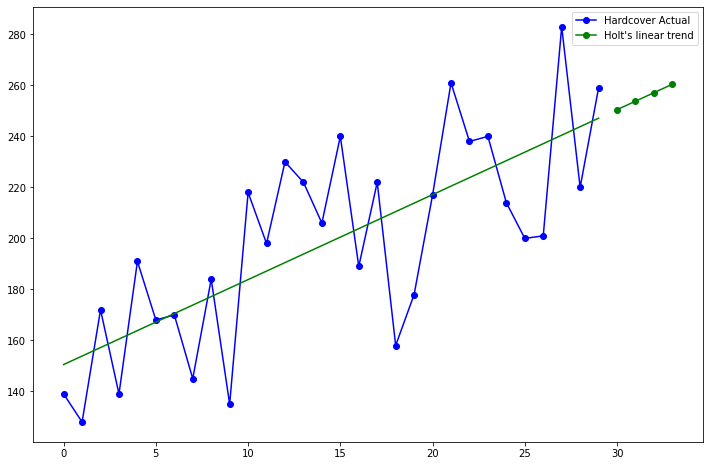

In [ ]:
def Holtslinear(df1, nforecast, color='k'):
    fit4 = Holt(df1, initialization_method="estimated").fit()
    fcast4 = fit4.forecast(nforecast).rename("Holt's linear trend")

    result = pd.concat([df1, fit4.fittedvalues.to_frame(name='fitted')], axis=1)

    plt.figure(figsize=(12, 8))
    line_actual, = plt.plot(df1, marker='o', color=color)
    plt.plot(fit4.fittedvalues, color='g')
    line4, = plt.plot(fcast4, marker='o', color='g')
    plt.legend([line_actual, line4], [f"{df1.columns[0]} Actual", fcast4.name])
    plt.show()
    return result

r1 = Holtslinear(books[['Paperback']], 4, 'k')
r2 = Holtslinear(books[['Hardcover']], 4, 'b')

In [ ]:
RMSE(r1.Paperback, r1.fitted)
RMSE(r2.Hardcover, r2.fitted)

RMSE of Paperback Forcast : 30.170624395457548
RMSE of Hardcover Forcast : 27.185191413662945


# (e) Compare the RMSE measures of Holt's method for the two series to those of simple exponential smoothing in the previous question. (Remember that Holts method is using one more parameter than SES.) Discuss the merits of the two forecasting methods for these data sets.

RMSE measures of Holt's method is both less than SES.

# (f) Compare the forecasts for the two series using both methods. Which do you think is best?

Holt's method is better than SES since the forecasts of Holt's method is increase but the forecasts of SES is constant.